In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle

from config import ALL, TW0050, Tech, Fin, Slope

pd.set_option('display.max_columns', None)

In [2]:

stock_period = ('2010/01/01','2021/12/31')

# experiments
# Portfolio = TW0050
Portfolio = Slope


In [3]:
stock_df=[]
for stock in Portfolio['portfolio']: 
    try:
        print(f'Start Download {stock}')
        df = pdr.DataReader(str(stock)+'.TW', 'yahoo', start=stock_period[0], end=stock_period[1])
        df[stock] = df['Adj Close']
        df['date'] = df.index
        stock_df.append(df[['date',stock]])
    except:
        print(f'  {stock} Download Fail')
    
df = pd.concat(stock_df,axis=1).drop(columns='date')
df.index = df.index.to_series().apply(lambda x : str(x).replace('-','')[:8])
df.index.name = 'DateTime'
name = Portfolio['name']
df = df.dropna()
output_path = os.path.join('data',f'{name}.csv')
print(output_path)
df.to_csv(output_path)
df


Start Download 2379
Start Download 2357
Start Download 2881
Start Download 2882
Start Download 1303
Start Download 2002
Start Download 1402
Start Download 2207
Start Download 4904
Start Download 1216
data\Slope.csv


,2379,2357,2881,2882,1303,2002,1402,2207,4904,1216
DateTime,,,,,,,,,,
20100104,52.933357,143.330719,17.898693,29.239494,31.323599,18.490473,19.758347,49.164192,21.879297,17.334635
20100105,51.518036,143.098419,18.012840,29.190350,32.302467,18.517584,20.031389,49.421261,21.821878,17.089540
20100106,51.348190,149.835190,18.583590,29.681772,34.260185,18.571810,20.701584,49.292717,21.821878,17.356916
20100107,50.895290,151.693604,18.286800,29.386919,34.532097,18.436249,20.354073,49.421261,21.391182,16.933577
20100108,51.234959,153.319702,18.378124,29.681772,34.586479,18.897156,20.701584,49.678322,21.534750,16.933577
...,...,...,...,...,...,...,...,...,...,...
20211224,564.000000,321.285278,70.754051,56.797180,77.906830,32.029072,27.534645,590.258911,61.397892,65.799995
20211227,576.000000,323.456116,70.754051,56.983097,77.906830,31.758787,27.629921,595.097107,61.493977,65.703941
20211228,583.000000,324.324463,71.412674,57.912674,77.997520,31.893932,27.772835,595.097107,61.782234,65.992111


### Calculate Data Slope

In [4]:


output_path = os.path.join('data',f'{name}.csv')
print(output_path)
df = pd.read_csv(output_path,index_col=['DateTime'])
df.index = pd.to_datetime(df.index,format='%Y%m%d')
# test
slope_df_test = df[df.index>='2020/01/01']
slope_df_test = slope_df_test.reset_index(drop=True)
slopes_test = slope_df_test.apply(lambda x: np.polyfit(slope_df_test.index, x, 1)[0])

slope_df_train = df[(df.index>='2017/01/01') & (df.index<'2020/01/01')]
slope_df_train = slope_df_train.reset_index(drop=True)
slopes_train = slope_df_train.apply(lambda x: np.polyfit(slope_df_train.index, x, 1)[0])

slope_df = pd.concat([slopes_train, slopes_test],axis=1)
slope_df.index.name = 'code'
slope_df.index = slope_df.index.map(str)

# display(slope_df)
slope_df['diff']=slope_df[1]-slope_df[0]
slope_df = slope_df.sort_values(by='diff',ascending=False)
# display(slope_df)
# slope_df_10 = slope_df.index[:10]
# display(slope_df_10)
output_path = f'data/{name}_table.csv'
stock_code = pd.read_csv(output_path,index_col='code')
stock_code.index = stock_code.index.map(str)
# display(stock_code)
# pd.concat([slope_df, stock_code], axis=1)
# pd.merge(slope_df,stock_code, on=[slope_df.index, stock_code.index])
slope_df.join(stock_code)

data\Slope.csv


,0,1,diff,name,c_name
code,,,,,
2379,0.195931,0.783464,0.587533,瑞昱,電子工業
2357,-0.031317,0.402433,0.433749,華碩,電腦及週邊設備業
2881,0.000724,0.098324,0.097600,NaN,NaN
2882,-0.004167,0.055409,0.059576,NaN,NaN
1303,0.013951,0.067267,0.053316,NaN,NaN
2002,0.001773,0.039392,0.037619,NaN,NaN
1402,0.012146,0.013974,0.001828,NaN,NaN
4904,0.011131,0.005287,-0.005844,NaN,NaN
1216,0.039129,0.009326,-0.029803,NaN,NaN


### Plot Stock

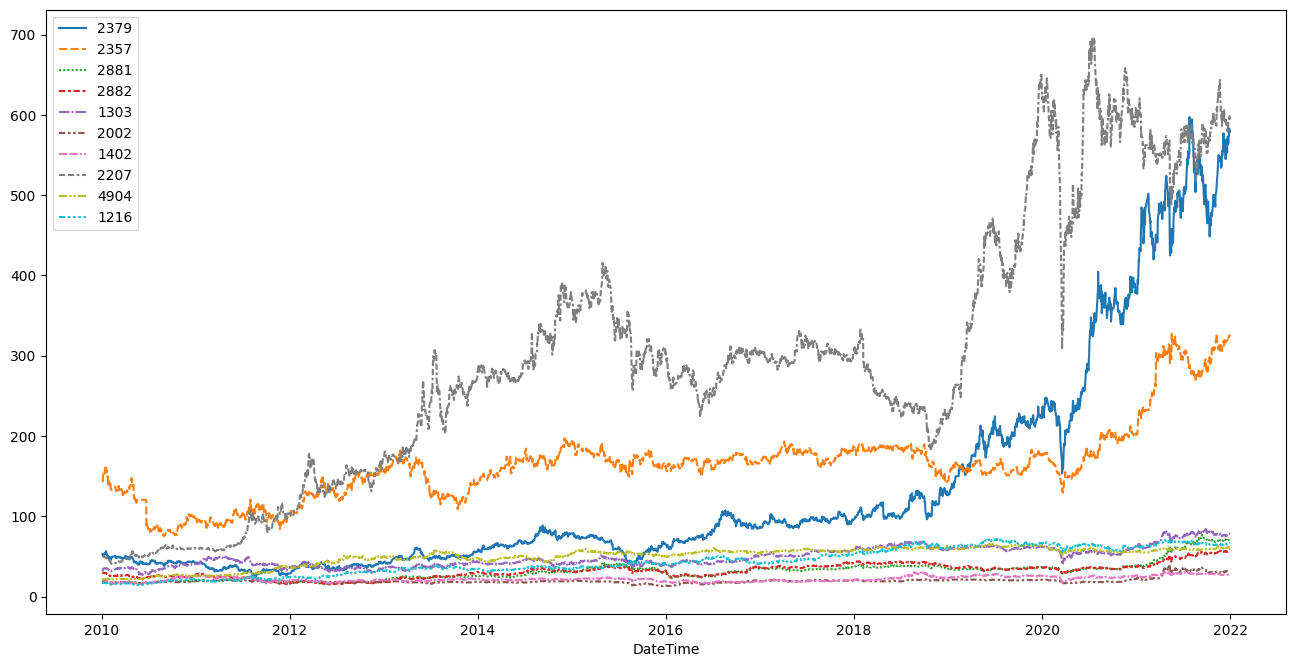

In [5]:
df = pd.read_csv(f'data/{name}.csv',index_col=0) 
# df = df[slope_df_10]
df.index = pd.to_datetime(df.index,format='%Y%m%d')
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=df, ax=ax)
plt.legend(loc='upper left')

### Read Data & Output Train/Test Data

In [6]:

name = Portfolio['name']
print(name)
train_year = ('2015','2020')
test_year = ('2021','2021')
data = pd.read_csv(f'data/{name}.csv',index_col=0)
data = pd.DataFrame(data, index=data.index, columns=data.columns)
# data = data[slope_df_10]
# print('stock', slope_df_10)
display(data.head())
display(data.describe())

scalerfile = f'scaler/{name}_{train_year[0]}_{train_year[1]}_scaler.sav'
print(scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(data)
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# portfolio_stock = []
# data = data[portfolio_stock]

train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{name}_{train_year[0]}_{train_year[1]}.csv'
print('Train Data:',output_path)
train.to_csv(output_path)
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
output_path = f'data/{name}_{test_year[0]}_{test_year[1]}.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

Slope


,2379,2357,2881,2882,1303,2002,1402,2207,4904,1216
DateTime,,,,,,,,,,
20100104,52.933357,143.330719,17.898693,29.239494,31.323599,18.490473,19.758347,49.164192,21.879297,17.334635
20100105,51.518036,143.098419,18.012840,29.190350,32.302467,18.517584,20.031389,49.421261,21.821878,17.089540
20100106,51.348190,149.835190,18.583590,29.681772,34.260185,18.571810,20.701584,49.292717,21.821878,17.356916
20100107,50.895290,151.693604,18.286800,29.386919,34.532097,18.436249,20.354073,49.421261,21.391182,16.933577
20100108,51.234959,153.319702,18.378124,29.681772,34.586479,18.897156,20.701584,49.678322,21.534750,16.933577


,2379,2357,2881,2882,1303,2002,1402,2207,4904,1216
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,130.574907,164.130664,30.946952,31.591087,48.935905,19.499142,21.940347,293.080334,49.875837,43.336744
std,135.456366,48.289856,11.690646,8.954106,12.336180,3.698810,3.240267,165.366130,11.919155,16.735243
min,24.699411,75.230820,14.976456,15.107390,26.973101,12.787985,14.719470,40.745224,21.362469,14.348977
25%,46.261833,138.795643,22.358441,24.950069,39.741936,17.773081,19.383130,167.985443,45.948212,31.119254
50%,74.885277,164.333740,31.614105,32.420879,45.244537,18.851586,21.315365,283.160645,54.772503,41.621540
75%,130.208725,178.840683,35.676598,36.627117,58.680072,20.103346,24.261297,371.181732,58.281776,61.460094
max,597.282043,329.245026,76.587502,58.563381,84.164772,40.218788,30.898657,696.771362,65.849709,71.691368


scaler/Slope_2015_2020_scaler.sav
Train Data: data/Slope_2015_2020.csv
Test Data: data/Slope_2021_2021.csv


In [7]:
# portfolio_stock


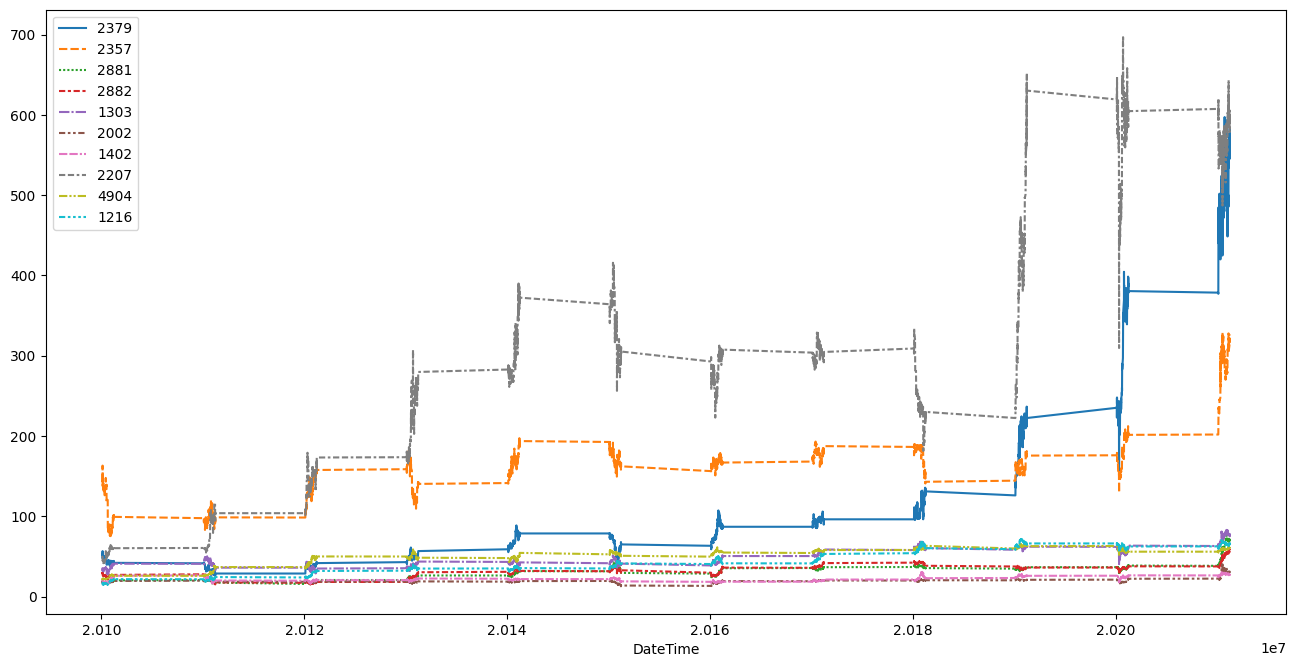

In [9]:

portfolio_stock = Portfolio['portfolio']
# portfolio_stock = ['1101','1216']
data_plot = data
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=data_plot, ax=ax)
plt.legend(loc='upper left')

In [10]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {"dataset": "TaiwanStockInfo"}
translation = requests.get(url, params=parameter)
trans = translation.json()
df_info = pd.DataFrame(trans['data'])
drop_list = ['ETF', '上櫃指數股票型基金(ETF)','受益證券', '指數投資證券(ETN)', '其他', '所有證券 ', '存託憑證','Index', '大盤']
df_info = df_info[df_info['industry_category'].apply(lambda x : x not in drop_list)]
df_info['row'] = df_info.sort_values(['stock_id','industry_category'], ascending=[True,False]).groupby(['stock_id']).cumcount() + 1
df_info = df_info[df_info['row']==1]
df_info = df_info[['stock_id','stock_name','industry_category']]
df_info = df_info.rename(columns={'stock_id':'code','stock_name':'name','industry_category':'c_name'})
df_info = df_info[df_info['code'].apply(lambda x : x in Portfolio['portfolio'])]

output_path = f'data/{name}_table.csv'
df_info.to_csv(output_path,index=False)
df_info

,code,name,c_name
318,1216,統一,食品工業
341,1303,南亞,塑膠工業
368,1402,遠東新,紡織纖維
598,2002,中鋼,鋼鐵工業
651,2207,和泰車,汽車工業
750,2357,華碩,電腦及週邊設備業
784,2379,瑞昱,電子工業
1110,2881,富邦金,金融保險
1114,2882,國泰金,金融保險
1848,4904,遠傳,電子工業
